# Supervised Learning with scikit-learn



In [226]:
# Import the course packages
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     GridSearchCV,
                                     RandomizedSearchCV)
from sklearn.linear_model import (LinearRegression, 
                                  Ridge, 
                                  Lasso, 
                                  LogisticRegression, 
                                  ElasticNet)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_squared_error, 
                             classification_report, 
                             confusion_matrix, 
                             roc_curve,
                             roc_auc_score,
                             precision_recall_curve,
                             plot_precision_recall_curve,
                             r2_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC # Support Vector Classiffication
from sklearn.preprocessing import (scale, StandardScaler)

import pandas as pd
import numpy as np
from scipy.stats import randint

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")

In [168]:
auto = pd.read_csv("data/auto.csv")
diabetes = pd.read_csv("data/diabetes.csv")
gapminder = pd.read_csv("data/gm_2008_region.csv")
votes = pd.read_csv("data/df_party.txt")
whitewine = pd.read_csv("data/white-wine.csv")

## Supervised learning


> ### What is machine learning?
- The art and science of:
  - Giving computers the ability to learn to make decisions from data 
  - without being explicitly programmed!
- Examples:
  - Learning to predict whether an email is spam or not
  - Clustering wikipedia entries into different categories
- Supervised learning: Uses labeled data
- Unsupervised learning: Uses unlabeled data


> ### Unsupervised learning
- Uncovering hidden patterns from unlabeled data
- Example:
  - Grouping customers into distinct categories (Clustering)


> ### Reinforcement learning
- Software agents interact with an environment
  - Learn how to optimize their behavior
  - Given a system of rewards and punishments
  - Draws inspiration from behavioral psychology
- Applications
  - Economics
  - Genetics
  - Game playing
- AlphaGo: First computer to defeat the world champion in Go


> ### Supervised learning
- Predictor variables/features and a target variable
- Aim: 
  - Predict the target variable, given the predictor variables
    - Classication: Target variable consists of categories
    - Regression: Target variable is continuous


> ### Naming conventions
- Features = predictor variables = independent variables
- Target variable = dependent variable = response variable


> ### Supervised learning
- Automate time-consuming or expensive manual tasks
  - Example: Doctor’s diagnosis
- Make predictions about the future
  - Example: Will a customer click on an ad or not?
- Need labeled data
  - Historical data with labels
  - Experiments to get labeled data
  - Crowd-sourcing labeled data


> ### Supervised learning in Python
- We will use scikit-learn/sklearn
  - Integrates well with the SciPy stack 
- Otherlibraries
  - Tensor Flow
  - keras


## Exploratory data analysis


> ### The Iris dataset
- Features:
  - Petal length 
  - Petal width
  - Sepal length
  - Sepal width
- Target variable:
  - Species Versicolor
  - Virginica
  - Setosa


In [36]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [37]:
type(iris.data)

numpy.ndarray

In [38]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [39]:
X = iris.data
y= iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
df2 = df.copy()
df2['target_names'] = iris.target
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
df2['target_names'] = df2.target_names.map({0:'setosa', 1:'versicolor', 2:'virginica'})
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


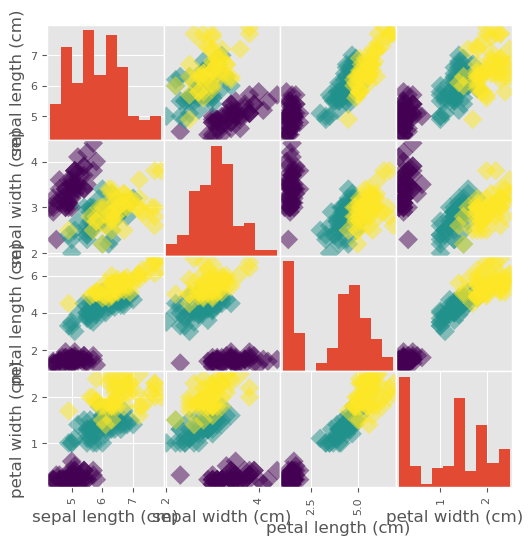

In [44]:
_=pd.plotting.scatter_matrix(df, c=y, figsize=[6,6], s=100, marker="D")

### Numerical EDA

We'll be working with a dataset obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) consisting of votes made by US House of Representatives Congressmen. our goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues.


> Note: Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that our focus can be directed towards understanding how to train and evaluate supervised learning models.


Before thinking about what supervised learning models we can apply to this, however, we need to perform Exploratory data analysis (EDA) in order to understand the structure of the data.

In [57]:
votes.head()

,Unnamed: 0,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [58]:
votes.describe()

,Unnamed: 0,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,217.000000,0.429885,0.558621,0.606897,0.406897,0.521839,0.650575,0.581609,0.590805,0.526437,0.512644,0.344828,0.393103,0.537931,0.609195,0.400000,0.857471
std,125.717938,0.495630,0.497123,0.489002,0.491821,0.500098,0.477337,0.493863,0.492252,0.499876,0.500416,0.475859,0.489002,0.499133,0.488493,0.490462,0.349994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,108.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,217.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,325.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,434.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Votes Visual EDA

The Numerical EDA we did gave us some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some visual EDA will give us an even better understanding of the data. all the features in this dataset are binary; that is, they are either 0 or 1. So a different type of plot would be more useful here, such as [**Seaborn's** `countplot`](http://seaborn.pydata.org/generated/seaborn.countplot.html).

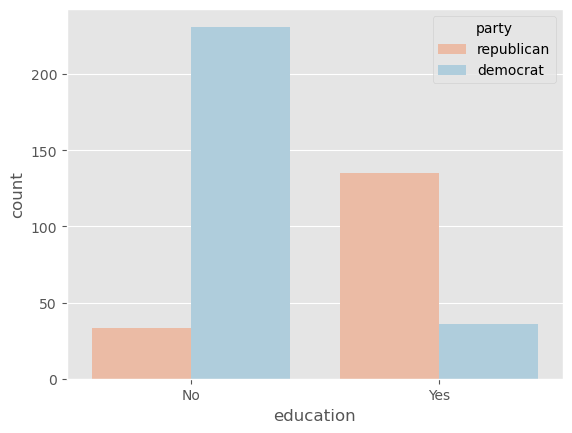

In [61]:
def plot_countplot(column):
    plt.figure()
    sns.countplot(x=column, hue='party', data=votes, palette='RdBu')
    plt.xticks([0,1], ['No', 'Yes'])
    plt.show()
    
plot_countplot("education")

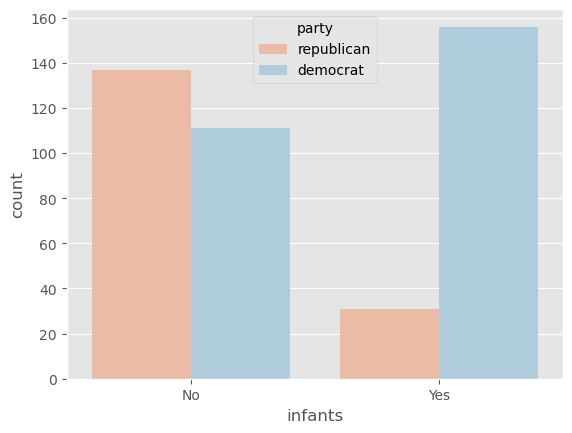

In [62]:
plot_countplot('infants')

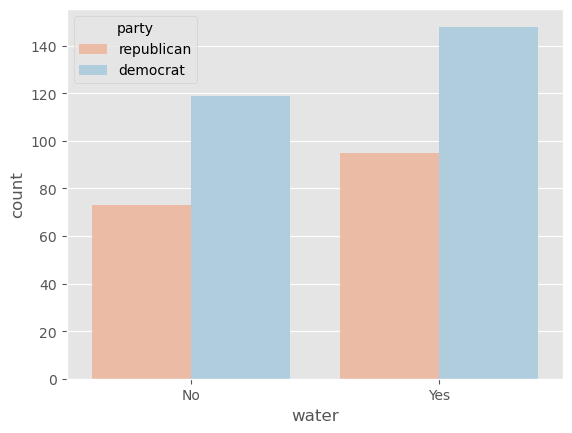

In [63]:
plot_countplot('water')

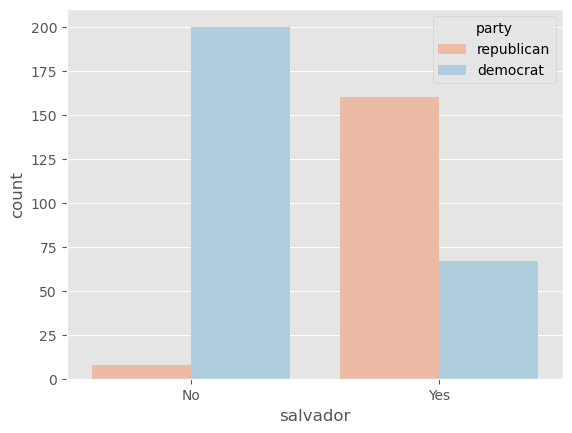

In [65]:
plot_countplot('salvador')

## The classification challenge


> ### k-Nearest Neighbors
- Basic idea: Predict the label of a data point by
  - Looking at the ‘k’ closest labeled data points
  - Taking a majority vote


> ### Scikit-learn fit and predict
- All machine learning models implemented as Python classes
  - They implement the algorithms for learning and predicting
  - Store the information learned from the data
- Training a model on the data = ‘fitting’ a model to the data
  - `.fit()` method
- To predict the labels of new data: `.predict()` method


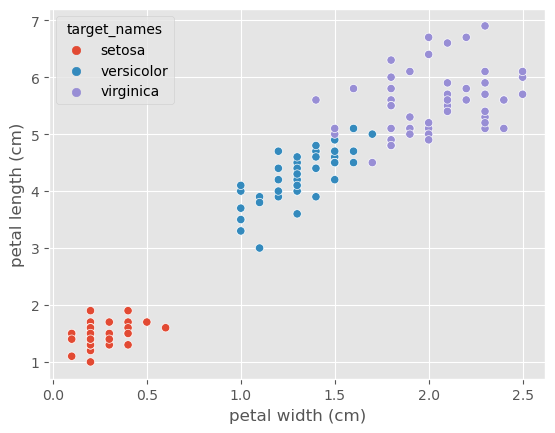

In [53]:
_ = sns.scatterplot(data=df2, x="petal width (cm)", y="petal length (cm)", hue='target_names')
plt.show()

### Iris dataset Using scikit-learn to fit a classier



In [54]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [55]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
                 [5.7, 2.6, 3.8, 1.3],
                 [4.7, 3.2, 1.3, 0.2]])
prediction = knn.predict(X_new)
prediction

array([1, 1, 0])

In [67]:
# Create arrays for the features and the response variable
y_votes = votes['party'].values
X_votes = votes.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn_votes = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn_votes.fit(X_votes, y_votes)

KNeighborsClassifier(n_neighbors=6)

### k-Nearest Neighbors: Predict

In [68]:
# Load and create dataframe from file
X_new = pd.read_csv("data/X_new.txt")
print(X_new.info())
X_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1 non-null      int64  
 1   0           1 non-null      float64
 2   1           1 non-null      float64
 3   2           1 non-null      float64
 4   3           1 non-null      float64
 5   4           1 non-null      float64
 6   5           1 non-null      float64
 7   6           1 non-null      float64
 8   7           1 non-null      float64
 9   8           1 non-null      float64
 10  9           1 non-null      float64
 11  10          1 non-null      float64
 12  11          1 non-null      float64
 13  12          1 non-null      float64
 14  13          1 non-null      float64
 15  14          1 non-null      float64
 16  15          1 non-null      float64
dtypes: float64(16), int64(1)
memory usage: 264.0 bytes
None


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0.322981,0.862084,0.310688,0.750776,0.538754,0.736589,0.521465,0.984811,0.012442,0.746899,0.990327,0.765476,0.132453,0.322978,0.281737,0.43129


In [74]:
# Predict and print the label for the new data point X_new
new_prediction = knn_votes.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


Did your model predict 'democrat' or 'republican'? How sure can you be of its predictions? In other words, how can you measure its performance? This is what you will learn in the next video.

## Measuring model performance

> - In classication, accuracy is a commonly used metric
> - Accuracy = Fraction of correct predictions
> - Which data should be used to compute accuracy?
> - How well will the model perform on new data?
> - Could compute accuracy on data used to fit classifier
> - NOT indicative of ability to generalize
> - Split data into training and test set
> - Fit/train the classifier on the training set
> - Make predictions on test set
> - Compare predictions with the known labels


> ### Model complexity
- Larger k = smoother decision boundary = less complex model
- Smaller k = more complex model = can lead to overfitting

In [75]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X, y, test_size=.3, random_state=21, stratify=y)
knn_iris = KNeighborsClassifier(n_neighbors=8)
knn_iris.fit(X_train_iris, y_train_iris)
y_pred_iris = knn_iris.predict(X_test_iris)

print(f"Test set predictions \n{y_pred_iris}")

Test set predictions 
[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [76]:
knn_iris.score(X_test_iris, y_test_iris)

0.9555555555555556

### Train/Test Split + Fit/Predict/Accuracy

In [77]:
# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors =7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


In [78]:
X_train[0][10], y_train[0]

(16.0, 5)

### The digits recognition dataset


We'll be working with the [**MNIST**](http://yann.lecun.com/exdb/mnist/) digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Helpfully for the MNIST dataset, scikit-learn provides an `'images'` key in addition to the `'data'` and `'target'` keys that we have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this `'images'` key is useful for visualizing the images. On the other hand, the `'data'` key contains the feature array - that is, the images as a flattened array of 64 pixels.

In [79]:
# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

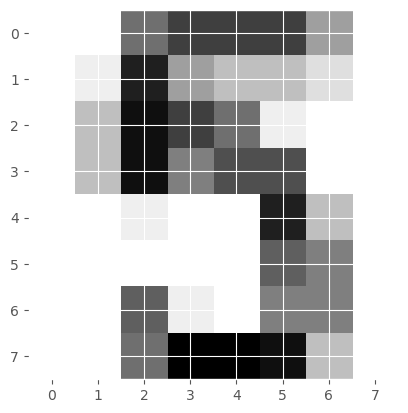

In [80]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Train/Test Split + Fit/Predict/Accuracy

Now that we have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, we will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the `.score()` method.

In [81]:
# Create feature and target arrays
X_digits = digits.data
y_digits = digits.target

# Split into training and test set
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, 
                                                                                test_size = 0.2, random_state= 42, 
                                                                                stratify=y_digits)

# Create a k-NN classifier with 7 neighbors: knn_digits
knn_digits = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn_digits.fit(X_train_digits, y_train_digits)

# Print the accuracy
knn_digits.score(X_test_digits, y_test_digits)

0.9833333333333333

Incredibly, this out of the box k-NN classifier with 7 neighbors has learned from the training data and predicted the labels of the images in the test set with 98% accuracy, and it did so in less than a second! This is one illustration of how incredibly useful machine learning techniques can be.

### Overfitting and underfitting


We will now construct such a model complexity curve for the digits dataset! We will compute and plot the training and testing accuracy scores for a variety of different neighbor values.

By observing how the accuracy scores differ for the training and testing sets with different values of k, we will develop your intuition for overfitting and underfitting.

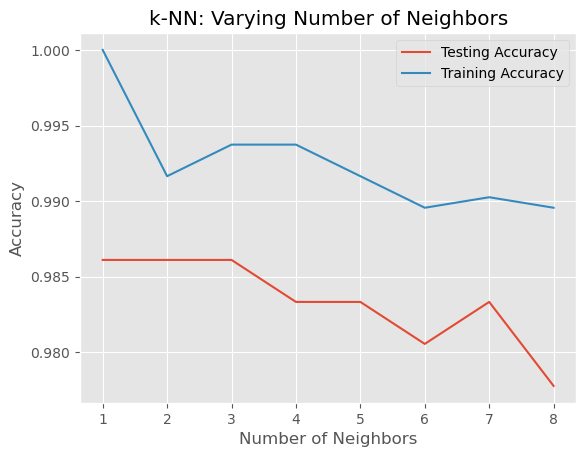

In [82]:
# Setup arrays to store train and test accuracies
neighbors_digits = np.arange(1, 9)
train_accuracy_digits = np.empty(len(neighbors_digits))
test_accuracy_digits = np.empty(len(neighbors_digits))

# Loop over different values of k
for i, k in enumerate(neighbors_digits):
    # Setup a k-NN Classifier with k neighbors: knn
    knn_digits = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn_digits.fit(X_train_digits, y_train_digits)
    
    #Compute accuracy on the training set
    train_accuracy_digits[i] = knn_digits.score(X_train_digits, y_train_digits)

    #Compute accuracy on the testing set
    test_accuracy_digits[i] = knn_digits.score(X_test_digits, y_test_digits)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors_digits, test_accuracy_digits, label = 'Testing Accuracy')
plt.plot(neighbors_digits, train_accuracy_digits, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.

## Regression

In the previous chapter, you made use of image and political datasets to predict binary as well as multiclass outcomes. But what if your problem requires a continuous outcome? Regression, which is the focus of this chapter, is best suited to solving such problems. You will learn about fundamental concepts in regression and apply them to predict the life expectancy in a given country using Gapminder data.

### Linear regression on higher dimesions

Given the equation model

> $ y = a_{1}x_{1} + a_{2}x_{2} + b$

* To fit a linear regression model here, you need to specify 3 variables

** In the same way, if we have more features, we will have higher dimensions:**

> $ y = a_{1}x_{1} + a_{2}x_{2} +  a_{3}x_{3} + ... +  a_{n}x_{n} + b$

* Must specify coefficient for each feature and the variable b
* Scikit-learn API works exactly the same way:
* Pass two arrays: Features, and target


### Which of the following is a regression problem?

Andy introduced regression to you using the Boston housing dataset. But regression models can be used in a variety of contexts to solve a variety of different problems.

Given below are four example applications of machine learning. **Your job is to pick the one that is best framed as a regression problem**.

* [_] An e-commerce company using labeled customer data to predict whether or not a customer will purchase a particular item --> outcome yes/no


* [_] A healthcare company using data about cancer tumors (such as their geometric measurements) to predict whether a new tumor is benign or malignant --> outcome benign/malignant


* [_] A restaurant using review data to ascribe positive or negative sentiment to a given review -> outcome: positive/negative


* [X] A bike share company using time and weather data to predict the number of bikes being rented at any given hour --> outcome: number of bikes (quantity)

In [83]:
boston = datasets.load_boston()
boston.data.shape

(506, 13)

In [84]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [85]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Creating feature and target arrays for the boston data

In [86]:
X_boston = boston.data
y_boston = boston.target

##### predicting house value from single feature

In [88]:
X_boston_rooms = X_boston[:,5]
type(X_boston_rooms), type(y_boston)

(numpy.ndarray, numpy.ndarray)

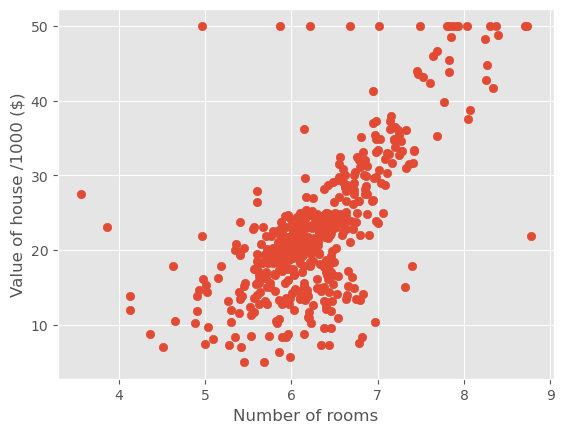

In [89]:
plt.scatter(X_boston_rooms, y_boston)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

##### Regression

In [94]:
X_boston_rooms_reshaped = X_boston_rooms.reshape(-1, 1)

reg_boston = LinearRegression()
reg_boston.fit(X_boston_rooms_reshaped, y_boston)

boston_prediction_space = np.linspace(min(X_boston_rooms), max(X_boston_rooms)).reshape(-1,1)

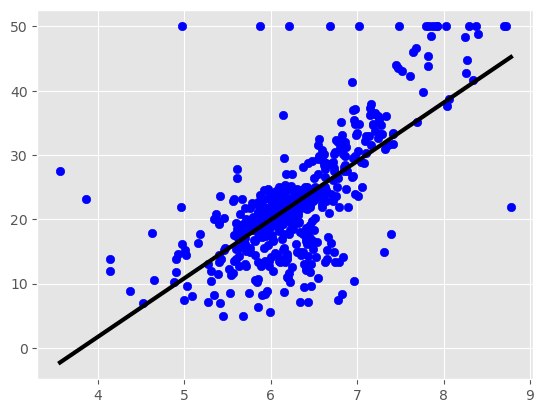

In [95]:
plt.scatter(X_boston_rooms, y_boston, color="blue")
plt.plot(boston_prediction_space, reg_boston.predict(boston_prediction_space), color='black', linewidth=3)
plt.show()

In [99]:
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, 
                                                                                test_size=.3, random_state=42)
reg_all_boston = LinearRegression()
reg_all_boston.fit(X_train_boston, y_train_boston)
y_pred_boston = reg_all_boston.predict(X_test_boston)
reg_all_boston.score(X_test_boston, y_test_boston)

0.7112260057484929

### Importing data for supervised learning

We will work with [Gapminder](https://www.gapminder.org/data/) data that we have consolidated into one CSV file.

Specifically, our goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population.

Since the target variable here is quantitative, this is a regression problem. To begin, we will fit a linear regression with just one feature: `'fertility'`, which is the average number of children a woman in a given country gives birth to.

Before that, however, we need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since we are going to use only one feature to begin with, we need to do some reshaping using NumPy's `.reshape()` method. 

In [97]:
# Read the CSV file into a DataFrame: df
gapminder = pd.read_csv("data/gapminder.csv")

# Create arrays for features and target variable
y_gapminder = gapminder.life.values
X_gapminder = gapminder.fertility.values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y_gapminder.shape))
print("Dimensions of X before reshaping: {}".format(X_gapminder.shape))

# Reshape X and y
y_gapminder = y_gapminder.reshape(-1,1)
X_gapminder = X_gapminder.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y_gapminder.shape))
print("Dimensions of X after reshaping: {}".format(X_gapminder.shape))


Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


### Exploring the Gapminder data



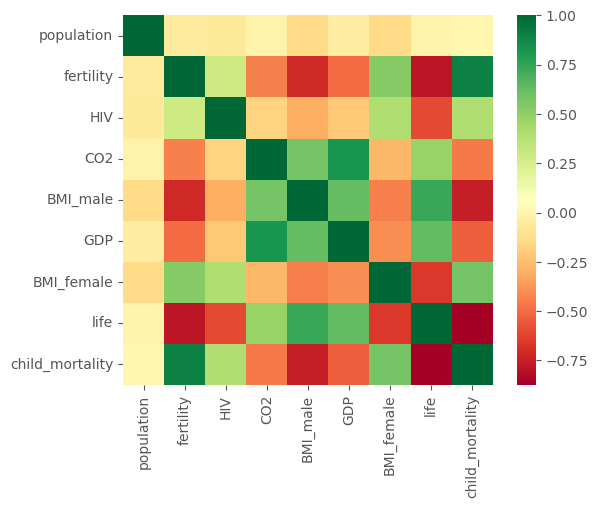

In [98]:
sns.heatmap(gapminder.corr(), square=True, cmap="RdYlGn")
plt.show()

In [17]:
df.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


### Linear regression

y = ax + b

Where: 

* y = target
* x = single feature
* a, b = parameters of model

#### How do we choose a and b?

* Define an error function for any given line
* Choose the line that minimizes the error function
* Ordinary least squares (OLS): Minimize sum of squares of
residuals

### Fit & predict for regression in gapminder dataset

We will fit a linear regression and predict life expectancy using just one feature. We will use the `'fertility'` feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is `'life'`.

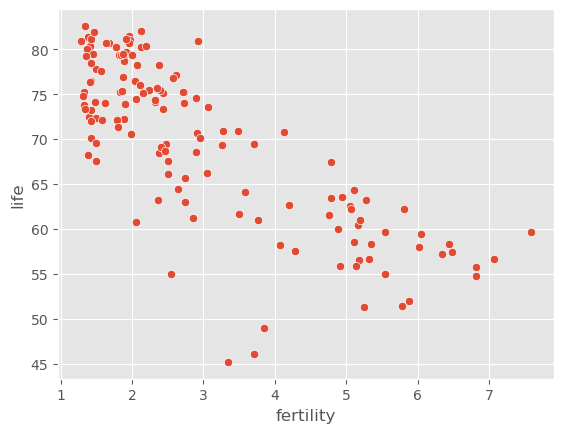

In [100]:
sns.scatterplot(data=gapminder, x="fertility", y="life")
plt.show()

As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Our job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. We will also compute and print the $R^2$ score using sckit-learn's `.score()` method

In [101]:
# Create the regressor: reg
reg_gapminder = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_gapminder), max(X_gapminder)).reshape(-1,1)

# Fit the model to the data
reg_gapminder.fit(X_gapminder,y_gapminder)

# Compute predictions over the prediction space: y_pred
y_pred_gapminder = reg_gapminder.predict(prediction_space)

# Print R^2 
print(reg_gapminder.score(X_gapminder, y_gapminder))

0.6192442167740035


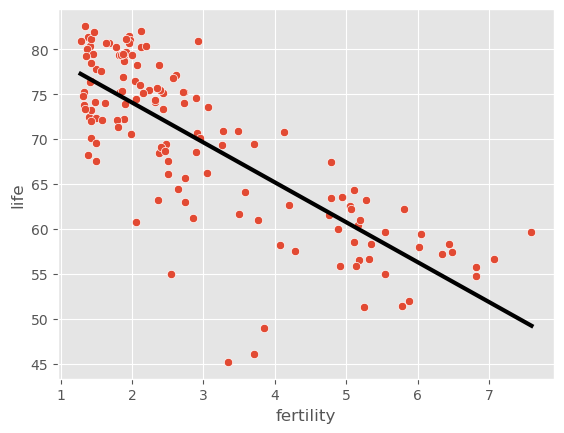

In [102]:
# Plot regression line
sns.scatterplot(data=gapminder, x="fertility", y="life")
plt.plot(prediction_space, y_pred_gapminder, color='black', linewidth=3)
plt.show()

### Train/test split for regression

train and test sets are vital to ensure that the supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

We will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over **all** features. In addition to computing the $R^2$ score, we will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models.

In [111]:
X_gapminder = gapminder.drop(["life", "Region"], axis=1).values

In [112]:
# Create training and test sets
X_train_gapminder, X_test_gapminder, y_train_gapminder, y_test_gapminder = train_test_split(X_gapminder, y_gapminder, test_size = .3, random_state=42)

# Create the regressor: reg_all
reg_all_gapminder = LinearRegression()

# Fit the regressor to the training data
reg_all_gapminder.fit(X_train_gapminder, y_train_gapminder)

# Predict on the test data: y_pred
y_pred_gapminder = reg_all_gapminder.predict(X_test_gapminder)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all_gapminder.score(X_test_gapminder, y_test_gapminder)))
rmse_gapminder = np.sqrt(mean_squared_error(y_test_gapminder, y_pred_gapminder))
print("Root Mean Squared Error: {}".format(rmse_gapminder))



R^2: 0.8380468731430133
Root Mean Squared Error: 3.247601080036947


## Cross-validation


> ### Cross-validation motivation
- Model performance is dependent on way the data is split
- Not representative of the model’s ability to generalize
- Solution: Cross-validation!


> ### Cross-validation and model performance
- 5 folds = 5-fold CV
- 10 folds = 10-fold CV
- k folds = k-fold CV
- More folds = More computationally expensive

In [113]:
cv_results_boston = cross_val_score(reg_all_boston, X_boston, y_boston, cv=5)
cv_results_boston

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [114]:
np.median(cv_results_boston)

0.5870234363057836

### 5-fold cross-validation

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.


We will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's `cross_val_score()` function uses R2 as the metric of choice for regression. Since We are performing 5-fold cross-validation, the function will return 5 scores. We will compute these 5 scores and then take their average.

In [115]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores_gapminder = cross_val_score(reg_gapminder, X_gapminder, y_gapminder, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores_gapminder)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_gapminder)))


[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793505


### K-Fold CV comparison


> Warning: Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes.

In [116]:
%timeit cross_val_score(reg_gapminder, X_gapminder, y_gapminder, cv=3)

3.92 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [117]:
%timeit cross_val_score(reg_gapminder, X_gapminder, y_gapminder, cv=10)

11.7 ms ± 217 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [118]:
# Perform 3-fold CV
cvscores_3_gapminder = cross_val_score(reg_gapminder, X_gapminder, y_gapminder, cv=3)
print(np.mean(cvscores_3_gapminder))

# Perform 10-fold CV
cvscores_10_gapminder = cross_val_score(reg_gapminder, X_gapminder, y_gapminder, cv=10)
print(np.mean(cvscores_10_gapminder))

0.8718712782622252
0.8436128620131367


### Regularized regression

#### Why regularize?

* Recall: Linear regression minimizes a loss function
* It chooses a coefficient for each feature variable
* Large coefficients can lead to overfitting: when you are working with a lot of features, that means your data lies in a high dimentional space, with large coeffiecients you can predict nearly everything. 
* Penalizing large coefficients: Regularization

### Ridge regression  --> **$L2$ norm**

If you took the sum of the squared values of the coefficients multiplied by some alpha, you would be computing the **$L2$ norm**

> ** Loss function = OLS loss function + $\alpha * \sum_{i=1}^{n} a_i^2 $ **

* Alpha: Parameter we need to choose
* Picking alpha here is similar to picking k in k-NN
* Hyperparameter tuning (More in Chapter 3)
* Alpha controls model complexity
* Alpha = 0: We get back OLS (Can lead to overfitting)
* Very high alpha: Can lead to underfitting


Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

* you will practice fitting ridge regression models over a range of different alphas, 
* and plot cross-validated R2 scores for each, using this function that we have defined for you, which plots the R2 score as well as standard error for each alpha. 


In [119]:
ridge_boston = Ridge(alpha=.1, normalize=True)
ridge_boston.fit(X_train_boston, y_train_boston)
ridge_pred_boston = ridge_boston.predict(X_test_boston)
ridge_boston.score(X_test_boston, y_test_boston)

0.6996938275127311

In [120]:
lasso_boston = Lasso(alpha=.1, normalize=True)
lasso_boston.fit(X_train_boston, y_train_boston)
lasso_pred_boston = lasso_boston.predict(X_test_boston)
lasso_boston.score(X_test_boston, y_test_boston)

0.595022953532855

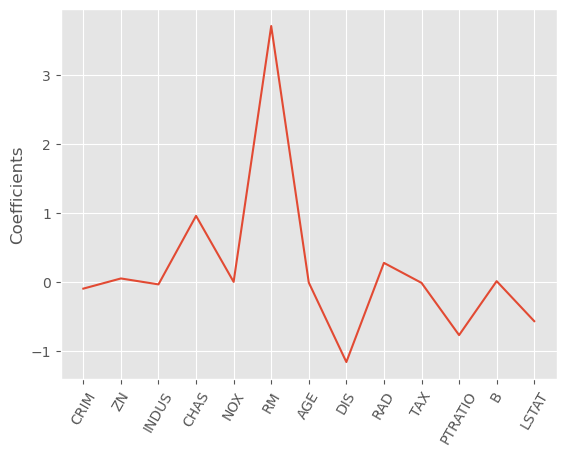

In [121]:
names_boston = boston.feature_names
lasso_boston_2 = Lasso(alpha=.1)
lasso_coef_boston = lasso_boston_2.fit(X_boston, y_boston).coef_
_ = plt.plot(range(len(names_boston)), lasso_coef_boston)
_ = plt.xticks(range(len(names_boston)), names_boston, rotation=60)
_ = plt.ylabel("Coefficients")
plt.show()

### Regularization I: Lasso

We saw how Lasso selected out the 'RM' feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

We will fit a lasso regression to the Gapminder data we have been working with and plot the coefficients. Just as with the Boston data.

In [122]:
df_columns_gapminder = pd.Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


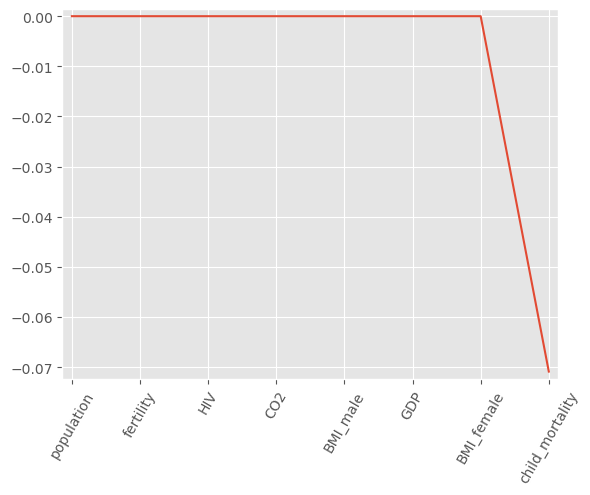

In [123]:
# Instantiate a lasso regressor: lasso
lasso_gapminder = Lasso(alpha=.4, normalize=True)

# Fit the regressor to the data
lasso_gapminder.fit(X_gapminder,y_gapminder)

# Compute and print the coefficients
lasso_coef_gapminder = lasso_gapminder.fit(X_gapminder,y_gapminder).coef_
print(lasso_coef_gapminder)

# Plot the coefficients
plt.plot(range(len(df_columns_gapminder)), lasso_coef_gapminder)
plt.xticks(range(len(df_columns_gapminder)), df_columns_gapminder.values, rotation=60)
plt.margins(0.02)
plt.show()


According to the lasso algorithm, it seems like `child_mortality` is the most important feature when predicting life expectancy.

Regularization II: Ridge


Lasso is great for feature selection, but when building regression models, Ridge regression should be the first choice. 

lasso performs regularization by adding to the loss function a penalty term of the _absolute_ value of each coefficient multiplied by some alpha. This is also known as $L1$ regularization because the regularization term is the $L1$ norm of the coefficients. This is not the only way to regularize, however.




In [125]:
def display_plot(cv_scores, cv_scores_std):
    """plots the R^2 score as well as standard error for each alpha""" 
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    # Create plot object
    ax.plot(alpha_space, cv_scores)
    # Calc the error 
    std_error = cv_scores_std / np.sqrt(10)
    # Set filling
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    # Set labels
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    # Set limits and scale
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    # Show plot
    plt.show()

If instead we took the sum of the _squared_ values of the coefficients multiplied by some alpha - like in Ridge regression - we would be computing the $L2$ norm. We will fit ridge regression models over a range of different alphas, and plot cross-validated $R^2$ scores for each, using this function `display_plot`, which plots the $R^2$ score as well as standard error for each alpha:

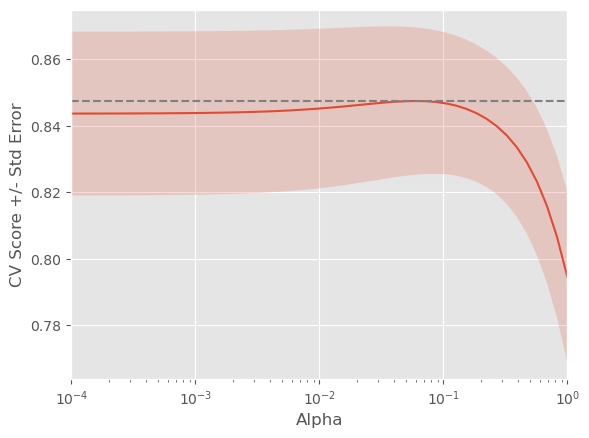

In [126]:
# Setup the array of alphas and lists to store scores
alpha_space_gapminder = np.logspace(-4, 0, 50)
ridge_scores_gapminder = []
ridge_scores_std_gapminder = []

# Create a ridge regressor: ridge
ridge_gapminder = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space_gapminder:

    # Specify the alpha value to use: ridge.alpha
    ridge_gapminder.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores_gapminder = cross_val_score(ridge_gapminder, X_gapminder, y_gapminder, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores_gapminder.append(np.mean(ridge_cv_scores_gapminder))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std_gapminder.append(np.std(ridge_cv_scores_gapminder))

# Display the plot
display_plot(ridge_scores_gapminder, ridge_scores_std_gapminder)

# Fine-tuning model


Having trained a model, the next task is to evaluate its performance. We will explore some of the other metrics available in scikit-learn that will allow us to assess the model's performance in a more nuanced manner.

### How good is your model?


> ### Classication metrics
- Measuring model performance with accuracy:
  - Fraction of correctly classied samples
  - Not always a useful metric
  

> ### Class imbalance example: Emails
- Spam classication
  - 99% of emails are real; 1% of emails are spam
- Could build a classier that predicts ALL emails as real
  - 99% accurate!
  - But horrible at actually classifying spam
  - Fails at its original purpose
- Need more nuanced metrics


> ### Diagnosing classication predictions
- Confusion matrix
- Accuracy: $\frac{tp+tn}{tp+tn+fp+fn}$


> ### Metrics from the confusion matrix
- Precision: $\frac{tp}{tp+fp}$
- Recal $\frac{tp}{tp+fn}$
- F1score: $2.\frac{precision.recal}{precision+recall}$
- High precision: Not many real emails predicted as spam
- High recall: Predicted most spam emails correctly


### Confusion matrix in scikit-learn: iris dataset


In [127]:
confusion_matrix(y_test_iris, y_pred_iris)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

In [128]:
print(classification_report(y_test_iris, y_pred_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [129]:
X_train_votes, X_test_votes, y_train_votes, y_test_votes = train_test_split(X_votes, y_votes, test_size=.4, random_state=42)
knn_votes = KNeighborsClassifier(n_neighbors=8)
knn_votes.fit(X_train_votes, y_train_votes)
y_pred_votes = knn_votes.predict(X_test_votes)

In [130]:
confusion_matrix(y_test_votes, y_pred_votes)

array([[95, 20],
       [47, 12]], dtype=int64)

In [131]:
print(classification_report(y_test_votes, y_pred_votes))

              precision    recall  f1-score   support

    democrat       0.67      0.83      0.74       115
  republican       0.38      0.20      0.26        59

    accuracy                           0.61       174
   macro avg       0.52      0.51      0.50       174
weighted avg       0.57      0.61      0.58       174



The support gives the number of samples of the true response that lie in that class, the support was the number of Republicans or Democrats in the test set on which the classification report was computed. The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.

### Metrics for classification

We evaluated the performance of k-NN classifier based on its accuracy. However, accuracy is not always an informative metric. We will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.

We'll work with the [PIMA Indians](https://www.kaggle.com/uciml/pima-indians-diabetes-database) dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.

In [133]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [134]:
y_pidd = diabetes.diabetes.values
X_pidd = diabetes.drop("diabetes", axis=1).values

In [135]:
# Create training and test set
X_train_pidd, X_test_pidd, y_train_pidd, y_test_pidd = train_test_split(X_pidd, y_pidd, test_size=.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn_pidd = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn_pidd.fit(X_train_pidd, y_train_pidd)

# Predict the labels of the test data: y_pred
y_pred_pidd = knn_pidd.predict(X_test_pidd)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test_pidd, y_pred_pidd))
print(classification_report(y_test_pidd, y_pred_pidd))


[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



## Logistic regression and the ROC curve


> ### Logistic regression for binary classication
- Logistic regression outputs probabilities
- If the probability ‘p’ is greater than 0.5:
  - The data is labeled ‘1’
- If the probability ‘p’ is less than 0.5:
  - The data is labeled ‘0’


> ### Probability thresholds
- By default, logistic regression threshold = 0.5
- Not specific to logistic regression
  - k-NN classifiers also have thresholds
- What happens if we vary the threshold?


### Building a logistic regression model


Time to build our first logistic regression model! scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. 

In [136]:
# Create the classifier: logreg
logreg_pidd = LogisticRegression()

# Fit the classifier to the training data
logreg_pidd.fit(X_train_pidd, y_train_pidd)

# Predict the labels of the test set: y_pred
y_pred_logreg_pidd = logreg_pidd.predict(X_test_pidd)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test_pidd, y_pred_logreg_pidd))
print(classification_report(y_test_pidd, y_pred_logreg_pidd))

[[170  36]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       206
           1       0.65      0.65      0.65       102

    accuracy                           0.77       308
   macro avg       0.74      0.74      0.74       308
weighted avg       0.77      0.77      0.77       308



### Precision-recall Curve

the precision-recall curve is generated by plotting the precision and recall for different thresholds. 

$$
precision = \frac{TP}{TP+FP}
$$
$$
recall = \frac{TP}{TP+FN}
$$

Text(0.5, 1.0, 'Precision-Recall curve: ')

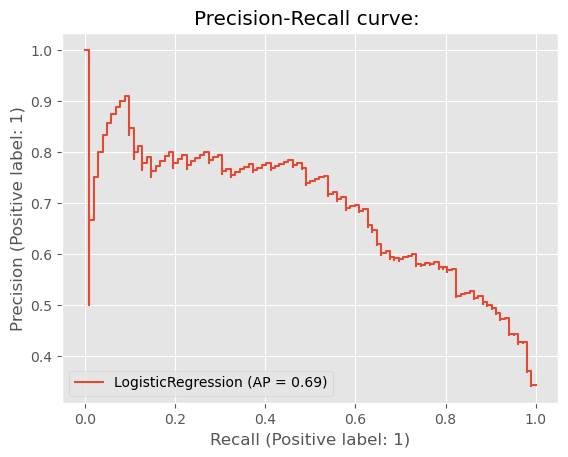

In [137]:
disp = plot_precision_recall_curve(logreg_pidd, X_test_pidd, y_test_pidd)
disp.ax_.set_title('Precision-Recall curve: ')

* A recall of 1 corresponds to a classifier with a low threshold in which all females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did not have diabetes.
* Precision is undefined for a classifier which makes no positive predictions, that is, classifies everyone as not having diabetes.
* When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions.

### Plotting an ROC curve


Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. most classifiers in scikit-learn have a `.predict_proba()` method which returns the probability of a given sample being in a particular class.  Having built a logistic regression model, we'll now evaluate its performance by plotting an ROC curve. In doing so, we'll make use of the `.predict_proba()` method and become familiar with its functionality.

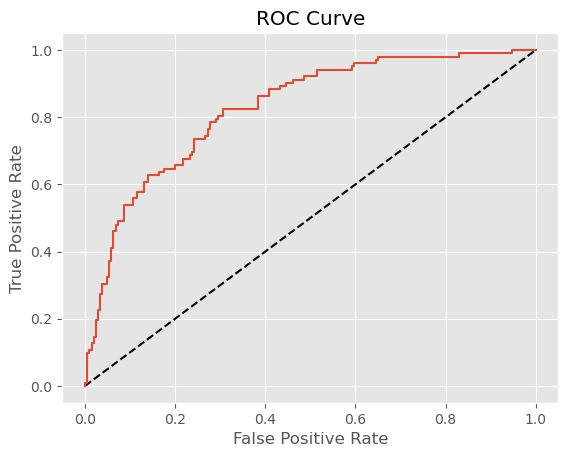

In [138]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_pidd = logreg_pidd.predict_proba(X_test_pidd)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr_pidd, tpr_pidd, thresholds_pidd = roc_curve(y_test_pidd, y_pred_prob_pidd)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_pidd, tpr_pidd)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Area under the ROC curve


> ### Area under the ROC curve (AUC)
- Larger area under the ROC curve = better model

### AUC computation


Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

We'll calculate AUC scores using the `roc_auc_score()` function from `sklearn.metrics` as well as by performing cross-validation on the diabetes dataset.

In [139]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test_pidd, y_pred_prob_pidd)))

# Compute cross-validated AUC scores: cv_auc
cv_auc_pidd = cross_val_score(logreg_pidd, X_pidd, y_pidd, cv=5, scoring="roc_auc")

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc_pidd))

AUC: 0.8260517799352751
AUC scores computed using 5-fold cross-validation: [0.80814815 0.80777778 0.82666667 0.8745283  0.83641509]


## Hyperparameter tuning


> ### Hyperparameter tuning
- Linear regression: Choosing parameters
- Ridge/lasso regression: Choosing alpha
- k-Nearest Neighbors: Choosing n_neighbors
- Parameters like alpha and k: Hyperparameters
- Hyperparameters cannot be learned by tting the model


> ### Choosing the correct hyperparameter
- Try a bunch of different hyperparameter values
- Fit all of them separately
- See how well each performs
- Choose the best performing one
- It is essential to use cross-validation


In [141]:
param_grid_votes = {"n_neighbors":np.arange(1,50)}
knn_votes = KNeighborsClassifier()
knn_cv_votes = GridSearchCV(knn_votes, param_grid=param_grid_votes, cv=5)
knn_cv_votes.fit(X_votes, y_votes)
knn_cv_votes.best_params_

{'n_neighbors': 25}

In [142]:
knn_cv_votes.best_score_

0.6275862068965518

In [143]:
# Setup the hyperparameter grid
c_space_pidd = np.logspace(-5, 8, 15)
param_grid_pidd = {'C': c_space_pidd}

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv_pidd = GridSearchCV(logreg_pidd, param_grid_pidd, cv=5)

# Fit it to the data
logreg_cv_pidd.fit(X_pidd,y_pidd)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv_pidd.best_params_)) 
print("Best score is {}".format(logreg_cv_pidd.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.774755962991257


### Hyperparameter tuning with RandomizedSearchCV

`GridSearchCV` can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use `RandomizedSearchCV`, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

Decision trees have many parameters that can be tuned, such as `max_features`, `max_depth`, and `min_samples_leaf`: This makes it an ideal use case for `RandomizedSearchCV`. Our goal is to use RandomizedSearchCV to find the optimal hyperparameters.

In [144]:
# Setup the parameters and distributions to sample from: param_dist
param_dist_pidd = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree_pidd = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv_pidd = RandomizedSearchCV(tree_pidd, param_dist_pidd, cv=5)

# Fit it to the data
tree_cv_pidd.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv_pidd.best_params_))
print("Best score is {}".format(tree_cv_pidd.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1}
Best score is 0.7323738780563294


## Hold-out set for final evaluation


> ### Hold-out set reasoning
- How well can the model perform on never before seen data?
- Using ALL data for cross-validation is not ideal
- Split data into training and hold-out set at the beginning
- Perform grid search cross-validation on training set
- Choose best hyperparameters and evaluate on hold-out set

### Hold-out set in practice I: Classification

You will now practice evaluating a model with tuned hyperparameters on a hold-out set. In addition to $C$, logistic regression has a `'penalty'` hyperparameter which specifies whether to use `'l1'` or `'l2'` regularization. Our job is to create a hold-out set, tune the `'C'` and `'penalty'` hyperparameters of a logistic regression classifier using `GridSearchCV` on the training set.

In [145]:
param_grid_pidd['penalty'] = ['l1', 'l2']

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv_pidd = GridSearchCV(logreg_pidd, param_grid_pidd, cv=5)

# Fit it to the training data
logreg_cv_pidd.fit(X_train_pidd, y_train_pidd)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv_pidd.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv_pidd.best_score_))


Tuned Logistic Regression Parameter: {'C': 163789.3706954068, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7782608695652173


### Hold-out set in practice II: Regression

Lasso used the $L1$ penalty to regularize, while ridge used the $L2$ penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the $L1$ and $L2$ penalties:

$$
a∗L1+b∗L2
$$

In scikit-learn, this term is represented by the `'l1_ratio'` parameter: An `'l1_ratio'` of 1 corresponds to an $L1$ penalty, and anything lower is a combination of $L1$ and $L2$.

We will `GridSearchCV` to tune the `'l1_ratio'` of an elastic net model trained on the Gapminder data. 

In [146]:
# Create the hyperparameter grid
l1_space_gapminder = np.linspace(0, 1, 30)
param_grid_gapminder = {'l1_ratio': l1_space_gapminder}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net_gapminder = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv_gapminder = GridSearchCV(elastic_net_gapminder, param_grid_gapminder, cv=5)

# Fit it to the training data
gm_cv_gapminder.fit(X_train_gapminder, y_train_gapminder)

# Predict on the test set and compute metrics
y_pred_gapminder = gm_cv_gapminder.predict(X_test_gapminder)
r2_gapminder = gm_cv_gapminder.score(X_test_gapminder, y_test_gapminder)
mse_gapminder = mean_squared_error(y_test_gapminder, y_pred_gapminder)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv_gapminder.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2_gapminder))
print("Tuned ElasticNet MSE: {}".format(mse_gapminder))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.8442220994403307
Tuned ElasticNet MSE: 10.144762014599413


# Preprocessing and pipelines

Pipelines, and how scikit-learn allows for transformers and estimators to be chained together and used as a single unit. Preprocessing techniques will be introduced as a way to enhance model performance, and pipelines will tie together concepts from previous sections.

## Preprocessing data


> ### Dealing with categorical features
- Scikit-learn will not accept categorical features by default
- Need to encode categorical features numerically
- Convert to ‘dummy variables’
  - 0: Observation was NOT that category
  - 1: Observation was that category


> ### Dealing with categorical features in Python
- scikit-learn:
  - `OneHotEncoder()`
- pandas:
  - `get_dummies()`


### Automobile dataset

- mpg:Target Variable
- Origin:Categorical Feature

In [147]:
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


### EDA w/ categorical feature

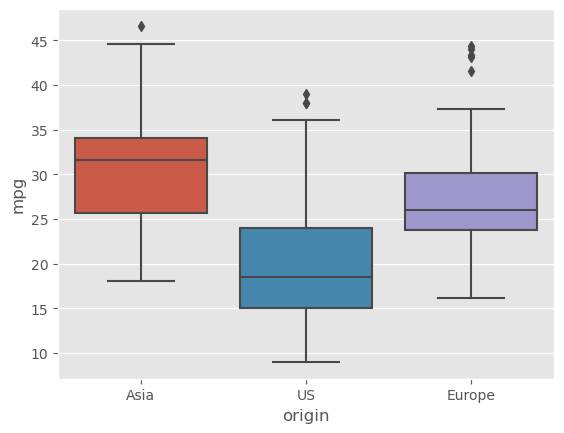

In [149]:
sns.boxplot(data=auto, x="origin", y="mpg", order=['Asia', 'US', 'Europe'])
plt.show()

### Encoding dummy variables

In [150]:
autos_origin = pd.get_dummies(auto)
autos_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [151]:
X_autos_origin = autos_origin[["origin_Europe", "origin_US"]].values
y_autos_origin = autos_origin['mpg'].values

In [152]:
X_train_autos_origin, X_test_autos_origin, y_train_autos_origin, y_test_autos_origin, = train_test_split(X_autos_origin,
                                                                                                         y_autos_origin, 
                                                                                                         test_size=.3, 
                                                                                                         random_state=42)
ridge_autos_origin = Ridge(alpha=.5, normalize=True).fit(X_train_autos_origin, y_train_autos_origin)
ridge_autos_origin.score(X_test_autos_origin, y_test_autos_origin)

0.3241789154336544

### Exploring categorical features

The Gapminder dataset that we worked with in previous section also contained a categorical `'Region'` feature, which we dropped since we did not have the tools to deal with it. Now however, we do, so we have added it back in!

We will explore this feature. Boxplots are particularly useful for visualizing categorical features such as this.

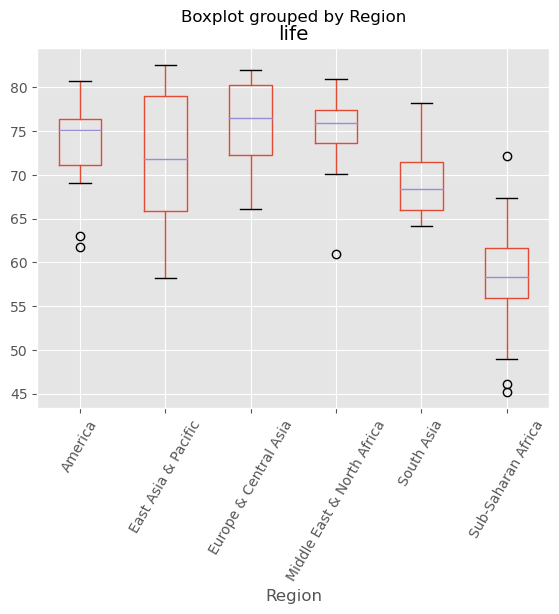

In [153]:
# Create a boxplot of life expectancy per region
gapminder.boxplot("life", "Region", rot=60)

# Show the plot
plt.show()

In [185]:
# Create dummy variables with drop_first=True: df_region
gapminder_region = pd.get_dummies(gapminder, drop_first=True)

# Print the new columns of df_region
print(gapminder_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [186]:
X_gapminder_region = gapminder_region.drop("life", axis=1).values
y_gapminder_region = gapminder_region.life.values

In [187]:
# Instantiate a ridge regressor: ridge
ridge_gapminder_region = Ridge(alpha=.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv_gapminder_region = cross_val_score(ridge_gapminder_region, X_gapminder_region, y_gapminder_region, cv=5)

# Print the cross-validated scores
print(ridge_cv_gapminder_region)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


#### Handle missing

In [159]:
diabetes.isna().any()

pregnancies    False
glucose        False
diastolic      False
triceps         True
insulin         True
bmi             True
dpf            False
age            False
diabetes       False
dtype: bool

In [169]:
diabetes.insulin.replace(0, np.nan, inplace=True)
diabetes.bmi.replace(0, np.nan, inplace=True)
diabetes.triceps.replace(0, np.nan, inplace=True)
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      541 non-null    float64
 4   insulin      394 non-null    float64
 5   bmi          757 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [173]:
# Setup the Imputation transformer: imp
imp_diabetes = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# Instantiate the SVC classifier: clf
clf_diabetes = SVC()

# Setup the pipeline with the required steps: steps
steps_diabetes = [('imputation', imp_diabetes),
        ('SVM', clf_diabetes)]

In [176]:
# Instantiate another imputer
imp_insulin = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# Reshape y to be a 2D array, which is required for the imputer
y = diabetes['insulin'].values.reshape(-1, 1)

# Impute missing values in 'insulin'
y = imp_insulin.fit_transform(y)

# Now y should not contain any missing values and you can use it in train_test_split and the rest of your code


In [177]:
pipeline_diabetes = Pipeline(steps=steps_diabetes)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the pipeline to your training data
pipeline_diabetes.fit(X_train, y_train)

# Predicting labels of the test set
y_pred = pipeline_diabetes.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         1
        18.0       0.00      0.00      0.00         1
        29.0       0.00      0.00      0.00         1
        36.0       0.00      0.00      0.00         2
        40.0       0.00      0.00      0.00         1
        42.0       0.00      0.00      0.00         1
        44.0       0.00      0.00      0.00         1
        45.0       0.00      0.00      0.00         1
        46.0       0.00      0.00      0.00         1
        49.0       0.00      0.00      0.00         2
        50.0       0.00      0.00      0.00         1
        52.0       0.00      0.00      0.00         1
        53.0       0.00      0.00      0.00         1
        55.0       0.00      0.00      0.00         1
        56.0       0.00      0.00      0.00         1
        57.0       0.00      0.00      0.00         1
        59.0       0.00    

## Fine-tuning your model

Having trained your model, your next task is to evaluate its performance. What metrics can you use to gauge how good your model is? So far, you have used accuracy for classification and R-squared for regression. In this chapter, you will learn about some of the other metrics available in scikit-learn that will allow you to assess your model's performance in a more nuanced manner. You will then learn to optimize both your classification as well as regression models using hyperparameter tuning.

### How good is your model? 

Measuring model performance with accuracy is not always the most useful metrics: for instance in email spam detection problem -class imbalance problem: we have a considerable difference in frequency between labels-, we usually find that the 1% of the emails are spam. We could build a model that classifies all the emails as real, and get a 99% accuracy!! However that would be a naïve classifier which, having a great accuracy, would fail on the classifying purpose of its task. 

#### Confusion matrix


                             
|                      | **Predicted spam email**|   Predicted real email  |
|----------:-----------|-------------:-----------|-------------:-----------|
|  Actual: Spam email  |      True positive(*)   |      False negative     |
|  Actual: Real email  |      False positive     |      True negative(*)   |

(*) Correctly labeled

Usually the class of interest is called the positive class. As we try to detect spam, the positive class is the spam detection. Accuracy can be calculated from the confusion matrix, by adding the diagonal and divide it by each element of it: 

> $ \frac{(tp + tn)}{(tp + tn + fp + fn)} $


#### Precision

> $ \frac{tp}{tp + tn}$ 

#### Recall or sensitivity

> $ \frac{tp}{tp + fn}$

#### F1 score (harmonic mean of precisson and sensitivity)

> $ \frac{2 * precision * recall}{(precison + recall)}$


### Logistic regression --> Binary classification

**Logistic regression** is used in classification problems, not in regression problems. The logistic function is:

<img src="images/logistic_function.jpg" />

> ${\displaystyle f(x)={\frac {L}{1+e^{-k(x-x_{0})}}}}$

Where:

* e = the natural logarithm base (also known as Euler's number),
* x0 = the x-value of the sigmoid's midpoint,
* L = the curve's maximum value, and
* k = the steepness of the curve

Due to its nature, the logistic regression outputs probabilities: 

* If the probability 'p' is greater than 0.5  --->   the data is labeled '1'
* If the probability 'p' is less than 0.5     --->   the data is labeled as '0'

So we can establish a decision boundary. 

<img src="images/decision_boundary.jpg" />


By default, logistic regression threshold = 0.5

* Not specific to logistic regression
* k-NN classifiers also have thresholds
* What happens if we vary the threshold?

<img src="images/roc-curve.jpg" />


### Hyperparameter tuning with GridSearchCV

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: $C$ which controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large $C$ can lead to an overfit model, while a small $C$ can lead to an underfit model.



### Hyperparameter tuning with RandomizedSearchCV

In [196]:
X = pd.read_csv("data/diabetes.csv", index_col=0)

In [198]:
y = pd.Series(X['diabetes'].values)
print(type(y), y.shape)
y.head()

<class 'pandas.core.series.Series'> (768,)


0    1
1    0
2    1
3    0
4    1
dtype: int64

In [199]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 5}
Best score is 1.0


### Hold-out set reasoning

You want to be absolutely certain about your model's ability to generalize to unseen data.  The idea is to tune the model's hyperparameters on the training set, and then evaluate its performance on the hold-out set which it has never seen before.

In [200]:
c_space = np.logspace(-5, 8, 15)
c_space

array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])

In [201]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 1.0


### Hold-out set in practice II: Regression

#### Regularized regression  --> elastic net (linear combination of $L1$ and $L2$)

Lasso used the $L1$ penalty to regularize, while ridge used the $L2$ penalty. There is another type of regularized regression known as the **elastic net**. In **elastic net regularization, the penalty term is a linear combination of the $L1$ and $L2$ penalties:**

> $a∗L1+b∗L2$

In [202]:
X = gapminder.drop(["life", "Region"], axis=1).values
y = gapminder['life']

In [203]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460284
Tuned ElasticNet MSE: 10.057914133398436


### Handling missing data  --> dropping missing data

You will see that there are certain data points labeled with a '?'. These denote missing values. As you saw in the video, different datasets encode missing values in different ways. Sometimes it may be a '9999', other times a 0 - real-world data can be very messy! If you're lucky, the missing values will already be encoded as NaN. We use NaN because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as .dropna() and .fillna(), as well as scikit-learn's Imputation transformer Imputer().

In this exercise, your job is to convert the '?'s to NaNs, and then drop the rows that contain them from the DataFrame.

In [207]:
# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('data/df_party.txt', index_col=0)
df.head()
X.shape

(139, 8)

In [208]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

party                0
infants              0
water                0
budget               0
physician            0
salvador             0
religious            0
satellite            0
aid                  0
missile              0
immigration          0
synfuels             0
education            0
superfund            0
crime                0
duty_free_exports    0
eaa_rsa              0
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (435, 17)


When many values in your dataset are missing, if you drop them, you may end up throwing away valuable information along with the missing data. It's better instead to develop an imputation strategy. This is where domain knowledge is useful, but in the absence of it, you can impute missing values with the mean or the median of the row or column that the missing value is in.

### Imputing missing data in a ML Pipeline

As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You will now be introduced to a fourth one - the Support Vector Machine, or SVM. For now, do not worry about how it works under the hood. It works exactly as you would expect of the scikit-learn estimators that you have worked with previously, in that it has the same .fit() and .predict() methods as before.

Having set up the pipeline steps, you can now use it for classification.

In [228]:
# Setup the Imputation transformer: imp
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]